In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from core.data import load_from_kaggle


c:\Anna-Project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
dataset_link = "umuttuygurr/e-commerce-customer-behavior-and-sales-analysis-tr" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

Destination directory '../data/raw\e-commerce-customer-behavior-and-sales-analysis-tr' already exists with files. Skipping download (replace=False).


In [3]:
files

['DATASET_README.md',
 'ecommerce_customer_behavior_dataset.csv',
 'ecommerce_customer_behavior_dataset_v2.csv',
 'ecommerce_dataset_readme_v_2.md']

In [17]:
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[2]]))
df.head()

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_000001-1,CUST_00001,2023-05-29,40,Male,Ankara,Books,29.18,1,0.00,29.18,Digital Wallet,Mobile,14,9,True,13,4
1,ORD_000001-2,CUST_00001,2023-10-12,40,Male,Ankara,Home & Garden,644.40,1,138.05,506.35,Credit Card,Desktop,14,8,True,6,2
2,ORD_000001-3,CUST_00001,2023-12-05,40,Male,Ankara,Sports,332.82,5,0.00,1664.10,Credit Card,Mobile,15,10,True,9,4
3,ORD_000002-1,CUST_00002,2023-05-11,33,Male,Istanbul,Food,69.30,5,71.05,275.45,Digital Wallet,Desktop,16,13,True,4,4
4,ORD_000002-2,CUST_00002,2023-06-16,33,Male,Istanbul,Beauty,178.15,3,0.00,534.45,Credit Card,Mobile,14,7,True,6,4


In [18]:
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2).T,
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(17049, 18)

'Description'

,count,mean,std,min,25%,50%,75%,max
Age,17049.0,34.95,11.05,18.00,26.00,35.00,42.00,75.00
Unit_Price,17049.0,447.90,722.32,5.05,73.26,174.68,494.57,7900.01
Quantity,17049.0,3.01,1.42,1.00,2.00,3.00,4.00,5.00
Discount_Amount,17049.0,69.79,240.70,0.00,0.00,0.00,32.71,6538.29
Total_Amount,17049.0,1277.44,2358.44,6.21,172.97,455.85,1267.75,37852.05
Session_Duration_Minutes,17049.0,14.54,2.93,4.00,13.00,15.00,17.00,26.00
Pages_Viewed,17049.0,9.00,2.26,1.00,7.00,9.00,11.00,18.00
Delivery_Time_Days,17049.0,6.50,3.49,1.00,4.00,6.00,8.00,25.00
Customer_Rating,17049.0,3.90,1.13,1.00,3.00,4.00,5.00,5.00


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
Order_ID,object,0,17049,"[ORD_000582-2, ORD_003117-2, ORD_002613-3]"
Customer_ID,object,0,5000,"[CUST_01248, CUST_04455, CUST_00861]"
Date,object,0,450,"[2023-10-17, 2023-10-16, 2023-08-10]"
Age,int64,0,57,"[34, 39, 37]"
Gender,object,0,3,"[Male, Male, Male]"
City,object,0,10,"[Izmir, Bursa, Istanbul]"
Product_Category,object,0,8,"[Electronics, Books, Home & Garden]"
Unit_Price,float64,0,14711,"[565.44, 29.0, 60.27]"
Quantity,int64,0,5,"[2, 4, 5]"
Discount_Amount,float64,0,5526,"[0.0, 43.54, 0.0]"


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17049 entries, 0 to 17048
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order_ID                  17049 non-null  object 
 1   Customer_ID               17049 non-null  object 
 2   Date                      17049 non-null  object 
 3   Age                       17049 non-null  int64  
 4   Gender                    17049 non-null  object 
 5   City                      17049 non-null  object 
 6   Product_Category          17049 non-null  object 
 7   Unit_Price                17049 non-null  float64
 8   Quantity                  17049 non-null  int64  
 9   Discount_Amount           17049 non-null  float64
 10  Total_Amount              17049 non-null  float64
 11  Payment_Method            17049 non-null  object 
 12  Device_Type               17049 non-null  object 
 13  Session_Duration_Minutes  17049 non-null  int64  
 14  Pages_

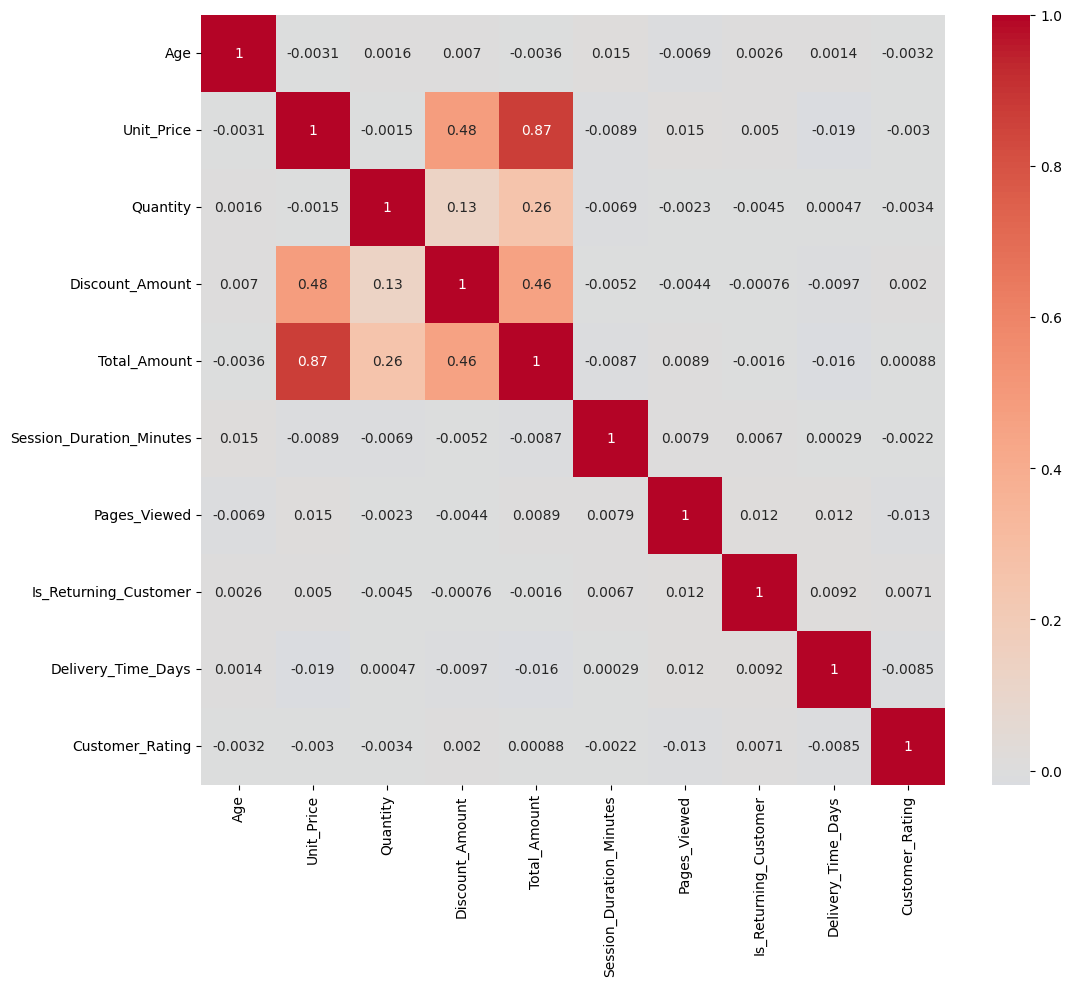

In [20]:
fig, ax = plt.subplots(figsize=(12, 10), dpi=100)

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, ax=ax);

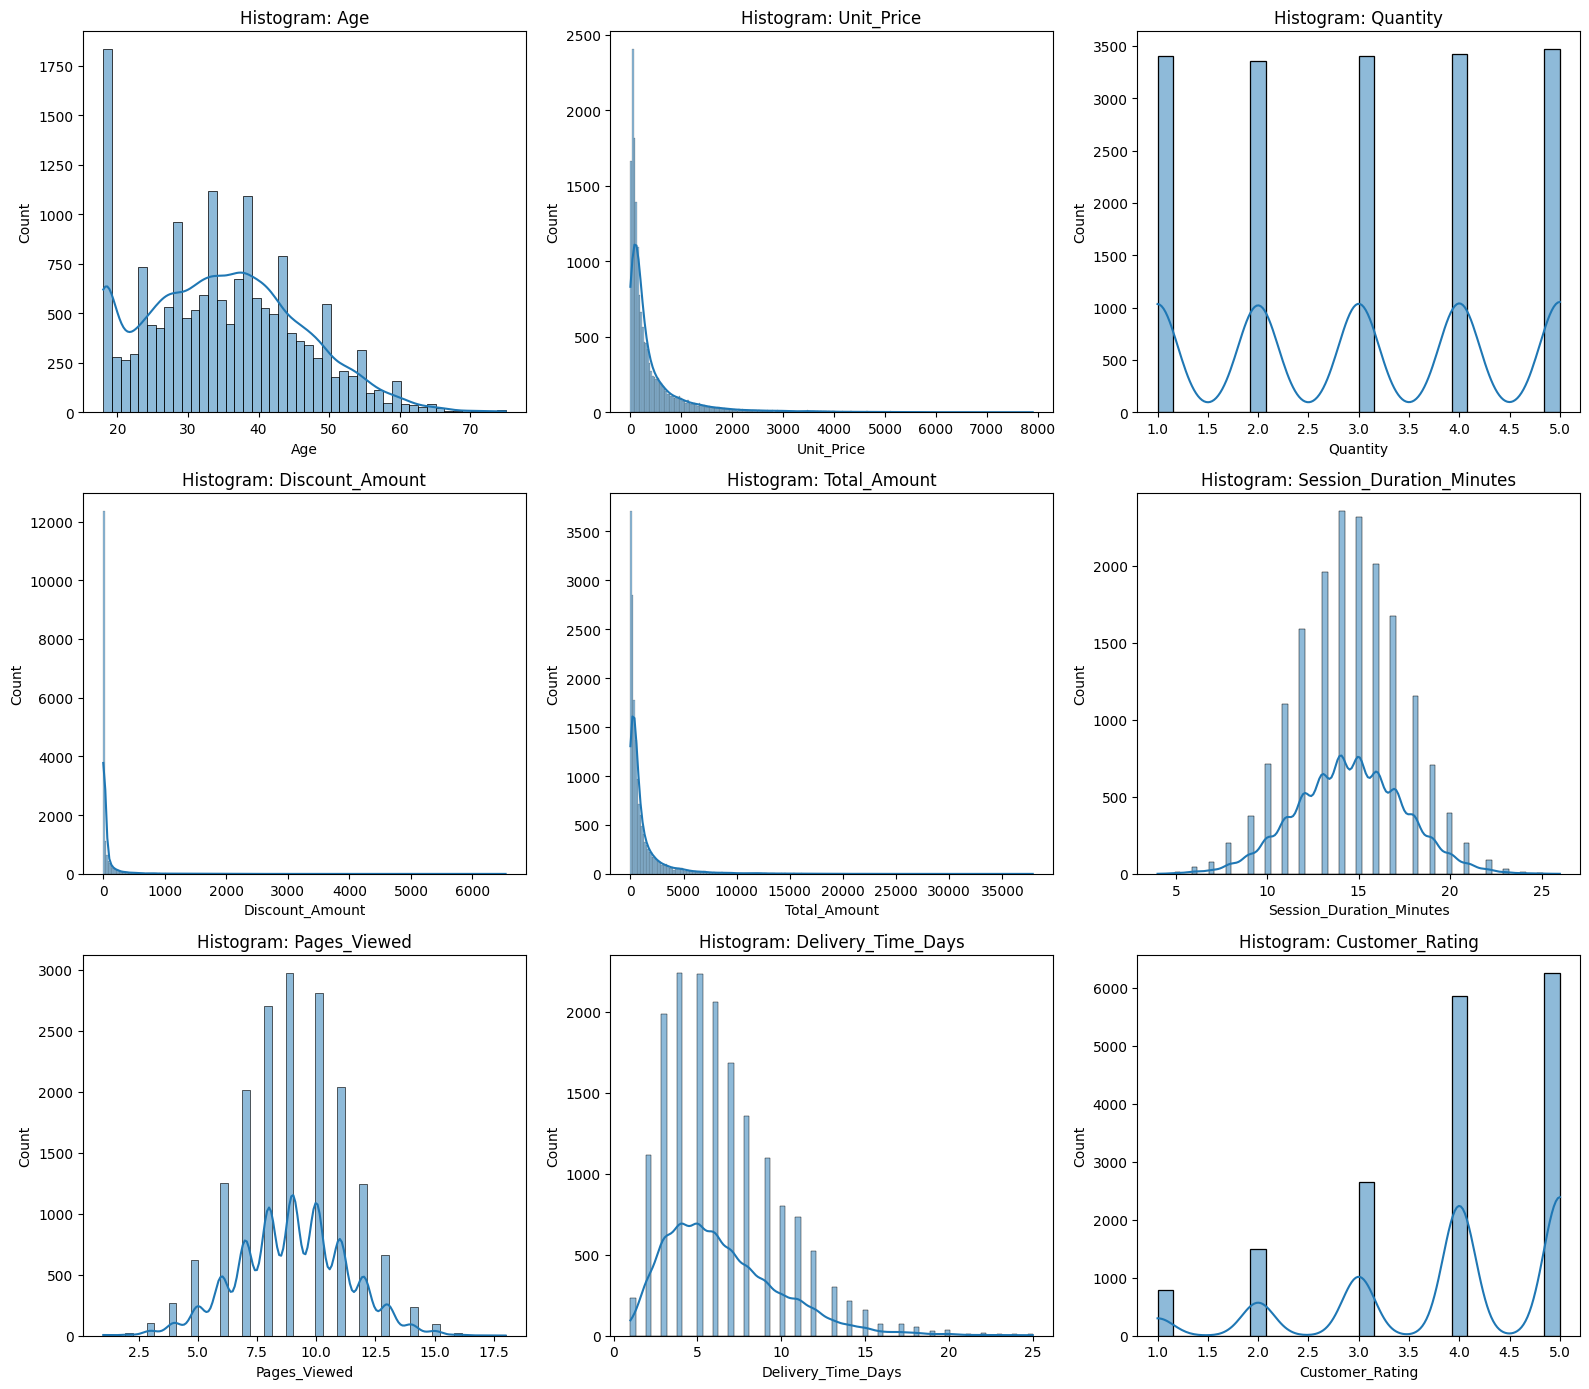

In [22]:
numeric_cols = [
    "Age", "Unit_Price", "Quantity", "Discount_Amount",
    "Total_Amount", "Session_Duration_Minutes",
    "Pages_Viewed", "Delivery_Time_Days", "Customer_Rating"
]

plt.figure(figsize=(16, 14))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram: {col}")
plt.tight_layout()
plt.show()

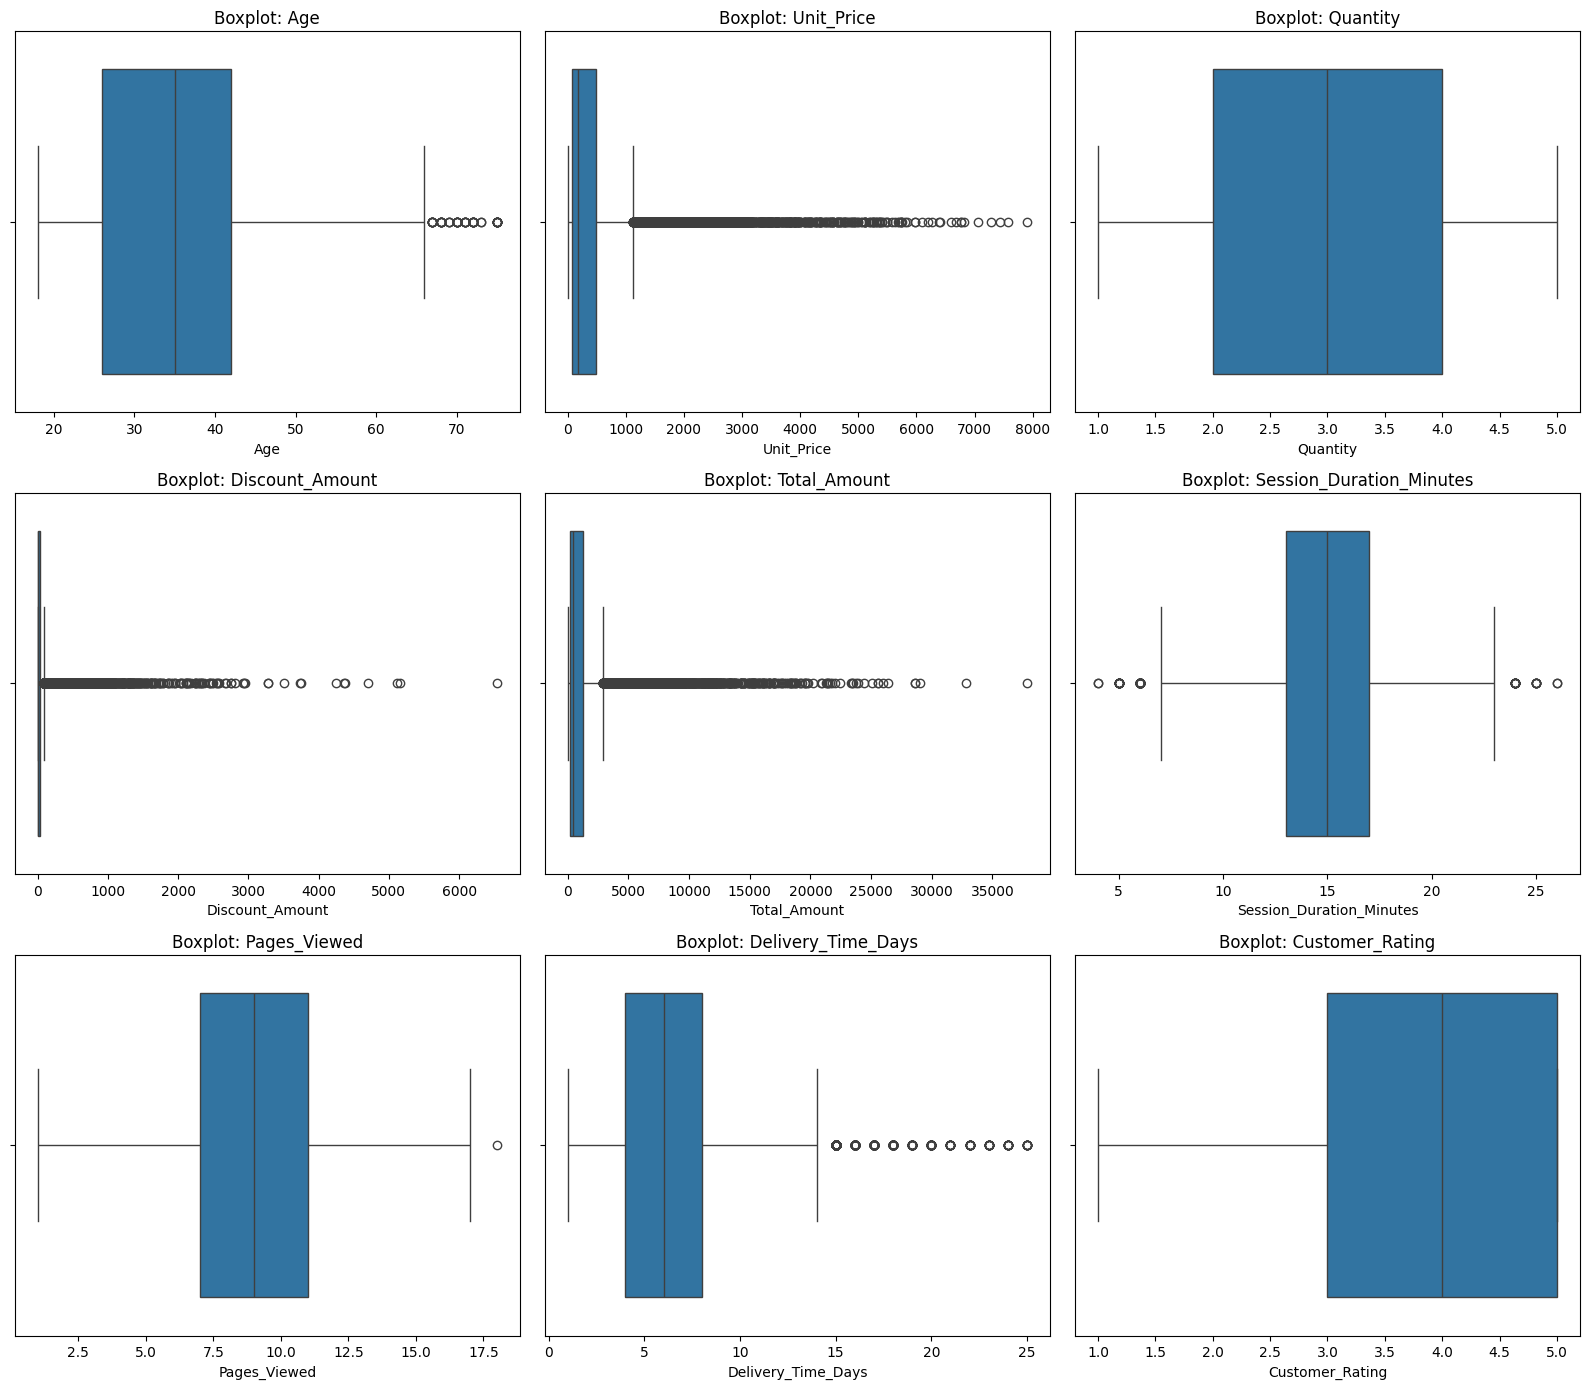

In [23]:
plt.figure(figsize=(16, 14))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")
plt.tight_layout()
plt.show()